In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import io
from skimage import img_as_float
from skimage.morphology import reconstruction
from skimage.filters import sobel
from skimage.color import rgb2gray

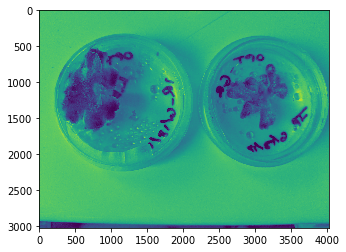

In [3]:
image = io.imread('./data/IMG_20180723_132602.jpg')
gray_image = rgb2gray(image)
plt.imshow(gray_image)

In [4]:
# Convert to float: Important for subtraction later which won't work with uint8

image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


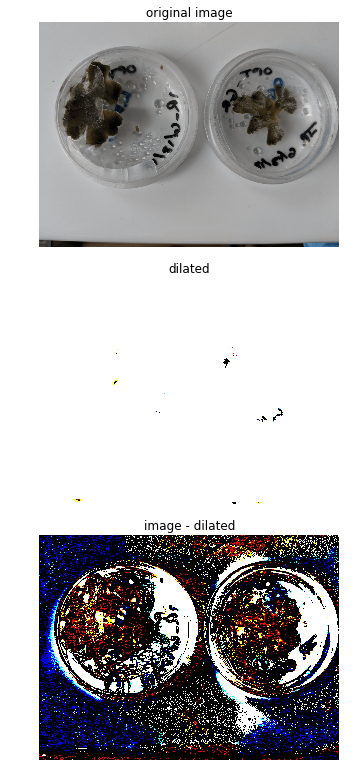

In [5]:
# Map Images

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                                    ncols=1,
                                    figsize=(8, 11),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()